# Contents

<pre></pre>
<font size=+1>
    
[Import Data](#Import-Data)<pre></pre>
[Manipulating data](#Manipulating-date)<pre></pre>
[Merging Dataframes and Groupby](#Merging-Dataframes-and-Groupby)<pre></pre>
[Plots](#Plots)<pre></pre>
[Imputing Data](#Imputing-Data)<pre></pre>
[Modeling](#Modeling)<pre></pre>
[Dictionaries Example](#Dictionaries-Example)<pre></pre>
[API Requests](#API-Requests)<pre></pre>
[Classes and OOP](#Classes-and-OOP)<pre></pre>
</font>

## Import Data

[Go back to the Table of Contents](#Contents)

### Packages usually want to upload with display settings

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

### Upload data with encoding type and explicit column names

In [ ]:
df = pd.read_csv('Csv_File_Name.csv', encoding='Encoding_Type',  names = ['Index', 'Column'])

### Get basic Info

In [ ]:
df.info()

### Check type of data

In [ ]:
df.dtypes

### Get a list of column names

In [ ]:
df.columns

### Check values of a given column

In [ ]:
#Check for NA values, education has no missing values
df_clean['education'].value_counts()

### Change data type

In [ ]:
string_fips_sliced_df['Full FIPS'] = string_fips_sliced_df['Full FIPS'].astype(dtype = int)

### Count missing values

In [ ]:
df['Column_Name'].isna().sum()

In [ ]:
#This shows the percent missing values for each  varialble in a dataframe

DF_Percent_Missing = DF_Final_Vars.isna().mean().round(4)

#This shows the variables with highest missing percent missing values first

DF_Percent_Missing.sort_values(ascending=False)

### Changes all cells named 'Cell_ Value' to null values

In [ ]:
#Replace "unknown" values as missing

df = df_unclean.replace('unknown', np.NaN, inplace=True)

In [ ]:
#Now check counts of missing values
#We decided to drop contact and poutcome from our analysis

df_unclean.isna().sum()

## Manipulating data

### New column 1/1000th

In [ ]:
#In order to provide more manageable values, 'price was divided by 1000, 
# converting 'price' to thousands ($)
df['price1000'] = df['price']/1000

In [ ]:
#Creates new dataframe for all houses worth less than 1 million dollars

df_Mill = df.loc[df['price'] < 1000000]
df_Mill.describe()

In [ ]:
#If you have a list of column names you would like to keep (If there are many many variables)
#This creates a dataframe of the variables of interest

Final_DF = df[List_Of_Kept_Var_Names]

### Transform to string take slice

In [ ]:
#Get Target FIPs codes ready to merge
#data type needs to be string for manipulation
string_fips = TRI_df['FIPS'].astype(dtype = str)

#This reduces fips code to the block group level
string_fips_sliced = string_fips.str.slice(0,-3)

### Strip Text

In [ ]:
#This removes non numerical values from strings
#Cleaned strings are then assigned to float values

import re
string_money_df = string_money_df.applymap(lambda x: re.sub(r'[^a-zA-Z0-9 -]', '', str(x)))
string_money_df_cleaned = string_money_df.astype(dtype=float)
string_money_df_cleaned.head()

### Dropping Data

In [ ]:
#Drop contact and poutcome variables
df_clean.drop(df_clean[['contact', 'poutcome']], axis=1, inplace=True)

In [ ]:
#Drop rows that contain missing values in a specific column

adjusted_df = df['Column_With_Missing_Values'].dropna()

In [ ]:
#We identify the missing rows from the variable job
#these rows were dropped from the entire dataset
####Drops all missing rows from job
df_clean=df_unclean[df_unclean['job'].notnull()]

## Merging Dataframes and Groupby

[Go back to the Table of Contents](#Contents)

In [ ]:
#Combine multiple dataframes into one dataframe with side by side columns

Imputed_dataset = pd.concat([imputed_cat_df, imputed_int_df, imputed_numeric_df], axis=1)

In [ ]:
#Merging Two Dataframes

#This is dataframe includes target variable and all explanatory variables
df_merged = pd.merge(df1, df2,  how='left', left_on='GIDBG', right_index=True)

In [ ]:
#Groupby aggregate on multiple variables

#Aggregate vars of interest by merging column and chemical
#This gives chemical count for unique latitude and longitudes

unique_merging_df = vars_of_interest_df.groupby(['Merging_Column','30. CHEMICAL']).aggregate(sum)

In [ ]:
#This shows all variables in a dataframe that have a column name from a list
#Just another way of doing it

DF_Final_Vars.columns[DF_Final_Vars.columns.isin(cat_var_list)]

## Plots

### Barplot

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [ ]:
ax = sns.barplot(x="tip", y="day", data=tips)

In [ ]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="bar",
                height=4, aspect=.7);

### Histogram

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)
x = np.random.normal(size=1000)
plt.hist(x, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

### Scatter Plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Box plot

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=tips["day"],y=tips["total_bill"])
plt.title("blah")

### Imputing Data

Quick Version

In [ ]:
#We identify the mode of the education variable
df_clean['education'].mode()

#We impute the missing values of education with its mode value
# fill missing values with mean column values
df_clean['education'].replace(to_replace = np.nan, value= 'whatever the mode is', inplace=True)

### Impute Categorical Variables

In [ ]:
#impute categorical variables

#This is to calculate median for strings
#Scipy for calculating mode
import scipy
from scipy import stats

#Loop
#I'm Here is to show if loop breaks
for i in range(0, len(cat_var_df.columns)):
        print('im here:', cat_var_df.columns[i])
        imputed_cat_df.iloc[:,i].replace(np.NaN, scipy.stats.mode(imputed_cat_df.iloc[:,i], axis=0, nan_policy='raise')[0][0], inplace=True)      
#impute mode for categorical vars

#check
imputed_cat_df.isna().sum()  

### Impute Integer Variables

In [ ]:
#impute median for integers
imputed_int_df = int_var_df
for i in range(0, len(int_var_df.columns)):
        imputed_int_df.iloc[:,i].replace(np.NaN, imputed_int_df.iloc[:,i].median(), inplace=True)
        
#check
imputed_int_df.isna().sum() 

### Impute numerical variables

In [ ]:
#impute mean for numerical vars
imputed_numeric_df = numeric_var_df
for i in range(0, len(numeric_var_df.columns)):
        print('im here:', numeric_var_df.columns[i])
        imputed_numeric_df.iloc[:,i].replace(np.NaN, imputed_numeric_df.iloc[:,i].mean(), inplace=True)
        
##Imputed numerical dataframe

#check
imputed_numeric_df.isna().sum()  

### One hot encoding

In [ ]:
#Get one hot encoded values for independent categorical variables
#merge one hot encoded variables with independent numeric variables

X_enc = pd.get_dummies(df_clean[['marital', 'job', 'education', 'default', 'housing', 'loan', 'y']], drop_first= True)

numeric_data = df_clean[['age', 'balance', 'duration', 'campaign', 'previous']]
    
cleaned_data_merge = pd.merge(numeric_data, X_enc, how = 'left', left_index=True, right_index=True)

### Scale Data StandardScalar
Not needed for logistic regression

In [1]:
import pandas as pd

cleaned_data_x = pd.read_csv('cleaned_X.csv')
cleaned_data_x.drop('Unnamed: 0', 1, inplace=True)
cleaned_data_y=pd.read_csv('cleaned_Y.csv')
cleaned_data_y.drop('Unnamed: 0', 1, inplace=True)
cleaned_data_y.head()

,y_yes
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Split data into dependent and independent variables

#cleaned_data_x = cleaned_data_merge.iloc[:,:-1]
#cleaned_data_x
#cleaned_data_y = cleaned_data_merge.iloc [:,-1:]
#cleaned_data_x.head(2)

In [ ]:
#Check missing values for independent variables
cleaned_data_x.isna().sum()

In [2]:
#Split Data into training and testing groups
#We will have to standardize the numeric independent variables
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cleaned_data_x, cleaned_data_y, test_size=0.1, random_state= 1254)

In [ ]:
#Isolate training numeric independent variables
x_train_numeric = x_train.iloc[:,:5]


#Isolate tersting numeric independent variables
x_test_numeric = x_test.iloc[:,:5]

In [ ]:
#Apply standard scalar
#Not Needed fo logistic Regression
import sklearn
from sklearn.preprocessing import StandardScaler

scalar = sklearn.preprocessing.StandardScaler()

scalar_x_train_numeric = pd.DataFrame(scalar.fit_transform(x_train_numeric), index =x_train_numeric.index, columns=x_train_numeric.columns[0:5], )
scalar_x_test_numeric = pd.DataFrame(scalar.transform(x_test_numeric), index = x_test_numeric.index, columns=x_test_numeric.columns[0:5])

In [ ]:
x_train

In [ ]:
#Merge standardized numerical independent variables with categorical independent variables
x_train_complete = pd.merge(scalar_x_train_numeric, x_train.iloc[:,5:], how = 'left', left_index=True, right_index=True)
x_test_complete = pd.merge(scalar_x_test_numeric, x_test.iloc[:,5:], how = 'left', left_index=True, right_index=True)

In [ ]:
#Check x training data
x_train_complete.head(3)

## Modeling

### Correlation plot

<AxesSubplot:title={'center':'Variables of Interest in our Analysis'}>

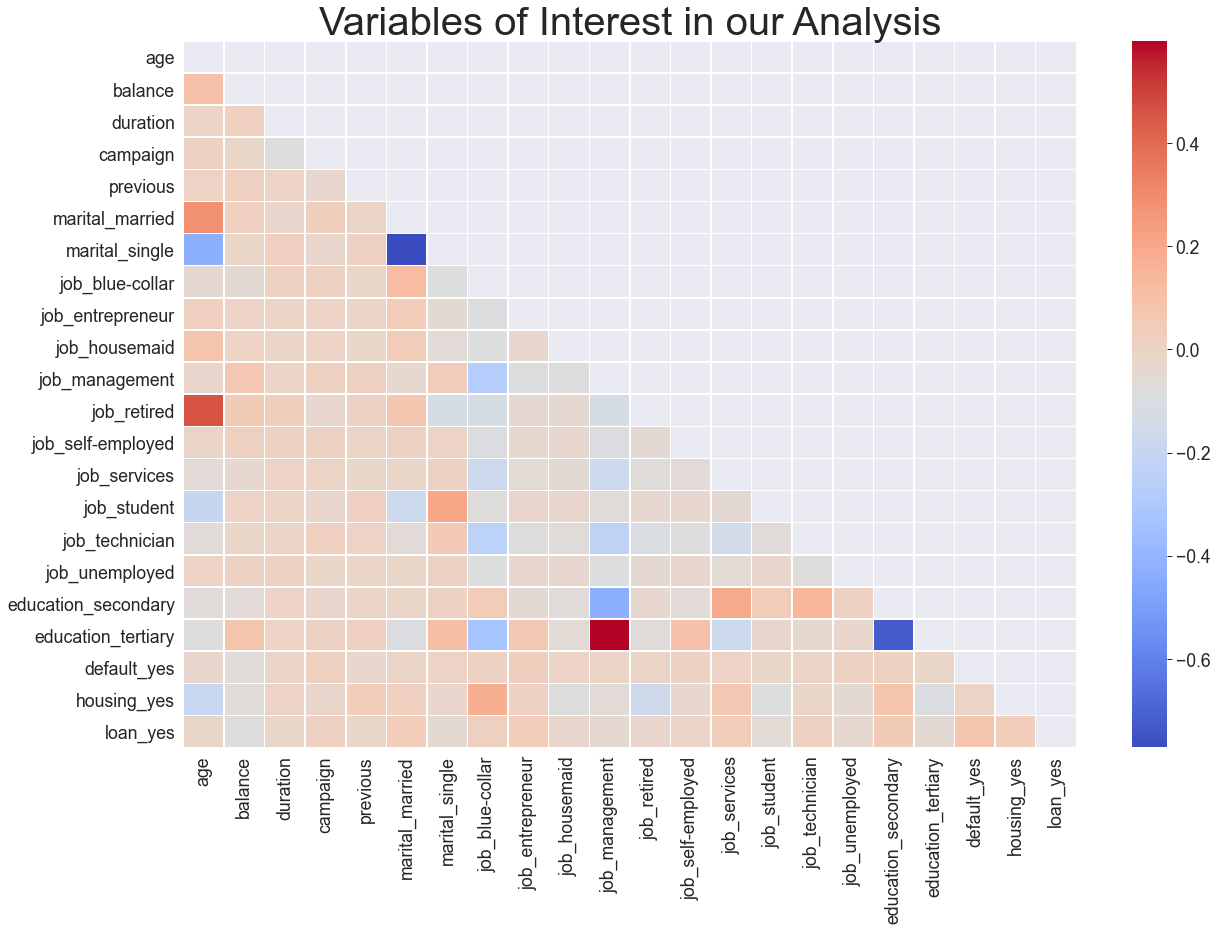

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,13)}, font_scale = 2)

corr = x_train.corr()
plt.figure(figsize=(20,13))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_context("paper", font_scale=2)
plt.title('Variables of Interest in our Analysis', fontsize=40)
sns.heatmap(x_train.corr(),annot=False, linewidth=.5, cmap="coolwarm", mask=mask)

In [4]:
#Begin fitting regression model
import statsmodels.api as sm
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = sm.Logit(y_train,x_train)
result=logmodel.fit()
print(result.summary())
## P values greater than .05 are not significant

Optimization terminated successfully.
         Current function value: 0.279710
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                40430
Model:                          Logit   Df Residuals:                    40408
Method:                           MLE   Df Model:                           21
Date:                Sun, 27 Dec 2020   Pseudo R-squ.:                  0.2278
Time:                        14:15:08   Log-Likelihood:                -11309.
converged:                       True   LL-Null:                       -14645.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0287      0.001    -19.896      0.000      -0.032      -0.026
ba

In [6]:
pvalues_df = pd.DataFrame(result.pvalues)
pvalues_df.reset_index(inplace=True)
pvalues_df.rename(columns={"index": "Variables", 0: "Pvalues"}, inplace=True)

#Creates new dataframe for all significant variables
df_significant = pvalues_df.loc[pvalues_df['Pvalues'] < .05]
df_significant.reset_index(inplace=True, drop=True)
df_significant

,Variables,Pvalues
0,age,4.398709e-88
1,balance,4.724016e-05
2,duration,0.000000e+00
3,campaign,1.831203e-58
4,previous,3.075643e-84
5,marital_married,7.071975e-27
6,marital_single,7.111932e-18
7,job_blue-collar,6.839080e-52
8,job_entrepreneur,7.730974e-13
9,job_housemaid,6.840743e-16


/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


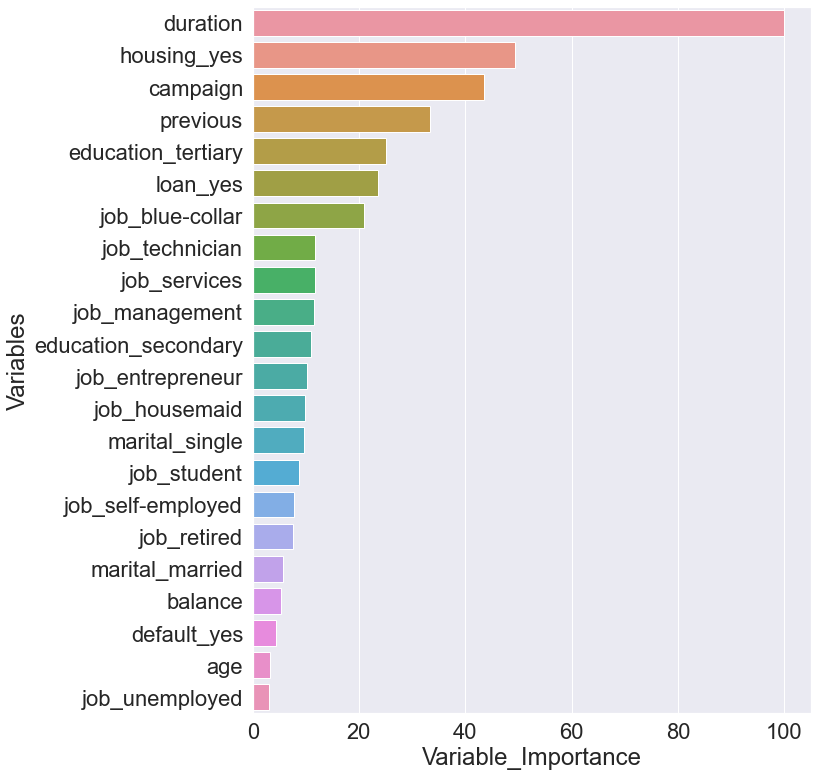

In [7]:
import numpy as np    
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

#Scale your data
scaler = StandardScaler()
scaler.fit(x_train) 
x_scaled = pd.DataFrame(scaler.transform(x_train),columns = x_train.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(x_scaled, y_train)

feature_importance = abs(clf.coef_[0])

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

df = pd.DataFrame(feature_importance, x_train.columns)
df.reset_index(inplace=True)
df.rename(columns={"index": "Variables", 0: "Variable_Importance"}, inplace=True)
df.sort_values(by=['Variable_Importance'], ascending=False, inplace=True)

Feature_Importance_Lasso = sns.barplot(x="Variable_Importance", y="Variables", data=df)

## Lasso regularization

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

# Define the grid for the alpha parameter
parameters = {'alpha':[100, 10, 1, 0.01, 0.001, 0.0005, .0001, .000001, .0000001, .000000001]}

# Fit it on X, Y and define the cv parameter for cross-validation
lasso=Lasso()
clf = GridSearchCV(lasso, parameters, cv = 3)
clf.fit(x_train, y_train)

# Get the best parameters and model
print(clf.best_estimator_)

Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [61]:
import seaborn as sns

model = LogisticRegression(penalty="l1", tol=.000001)
model = model.fit(x_scaled, y_train)
model.coef_
# lasso_df = pd.DataFrame(list(model.), list(model.coef_))
# lasso_df.reset_index(inplace=True)
# lasso_df.rename(columns={"level_0": "Lasso_Coefficients", 0: "Variables"}, inplace=True)
# lasso_df['Lasso_Coefficients_Absolute'] = abs(lasso_df['Lasso_Coefficients'])
# lasso_df.sort_values(by=['Lasso_Coefficients_Absolute'], ascending=False,inplace=True)
# Feature_Importance_Lasso = sns.barplot(x="Lasso_Coefficients_Absolute", y="Variables", data=lasso_df)

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.0326299 ,  0.05294399,  1.00238751, -0.4354689 ,  0.33435146,
        -0.05806487,  0.09725461, -0.20800404, -0.10143805, -0.09827353,
        -0.1140147 ,  0.07694102, -0.07698866, -0.11564922,  0.08786842,
        -0.11540868, -0.03052903,  0.10797551,  0.2496174 , -0.04306842,
        -0.49532622, -0.23571602]])

In [114]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.89


In [95]:
logreg.predict_proba(x_train)

array([[0.86785398, 0.13214602],
       [0.93940038, 0.06059962],
       [0.96348855, 0.03651145],
       ...,
       [0.95740742, 0.04259258],
       [0.85528478, 0.14471522],
       [0.90791591, 0.09208409]])

### Optimum Threshhold

In [ ]:
###Check ROC Curve for optimum threshhold

In [128]:
roc.iloc[90:115,:]

,fpr,tpr,1-fpr,tf,thresholds
90,0.018773,0.176707,0.981227,-0.804520,0.523896
91,0.019024,0.176707,0.980976,-0.804269,0.520164
92,0.019024,0.178715,0.980976,-0.802261,0.518918
93,0.019274,0.178715,0.980726,-0.802011,0.518100
94,0.019274,0.182731,0.980726,-0.797995,0.515805
95,0.020025,0.182731,0.979975,-0.797244,0.509878
96,0.020025,0.184739,0.979975,-0.795236,0.509624
97,0.020275,0.184739,0.979725,-0.794986,0.509423
98,0.020275,0.188755,0.979725,-0.790970,0.506180
99,0.020776,0.188755,0.979224,-0.790469,0.502969


In [122]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc_curve

metrics.plot_roc_curve(model, x_test, y_test)  
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
sns.lineplot(
    data=dots, x="TPR", y="FPR",
    size="", hue="choice",
    legend="full"
)

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
515,0.209011,0.791165,0.790989,0.000176,0.117954


In [112]:
THRESHOLD = 0.52
preds = np.where(logreg.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy: {:.5f}'.format(logreg.score(x_test, preds)))

Accuracy: 0.99688


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix

logreg = LogisticRegression()
grid={"C":np.array([0.001, 0.01, 0.1,.5, 1, 1.5, 3 , 5, 10]), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(x_train,y_train)
print('The Best Penalty:', logreg_cv.best_estimator_.get_params()['penalty'])
print('The Best C:', logreg_cv.best_estimator_.get_params()['C'])

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib

/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mango/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Mango/anaconda3/lib

The Best Penalty: l1
The Best C: 1.5


In [ ]:
logreg = LogisticRegression(penalty='l1', C=1.5)
logreg.fit(x_train, x_test)
THRESHOLD = 0.43
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy : {:.2f}'.format(logreg.score(X_test, preds)))


## Random Forest Feature Selection

In [10]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(x_train, y_train)
# predictions
rfc_predict = rfc.predict(x_test)

/Users/Mango/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [11]:
from sklearn.base import clone
import seaborn as sns

def RFC_Feature_Importance(model, x_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(x_train, y_train)
    benchmark_score = model_clone.score(x_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in x_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(x_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(x_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = pd.DataFrame({'Features': x_train.columns, 'Importance' : importances})
    importances_df.sort_values(by= ['Importance'], ascending=False, inplace=True)
    importances_df.reset_index(drop=True, inplace=True)
    
    return importances_df

In [12]:
importances_df = RFC_Feature_Importance(rfc, x_train, y_train, random_state=42)

/Users/Mango/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/Users/Mango/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/Mango/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/Mango/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/Mango/a

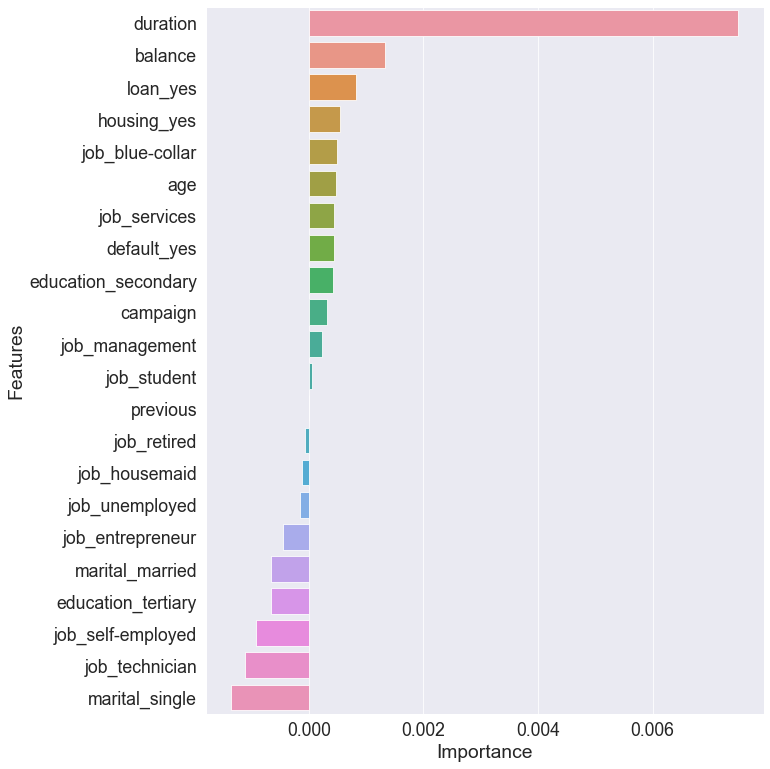

In [13]:
Feature_Importance_RFC = sns.barplot(x="Importance", y="Features", data=importances_df)

## Logistic Regression Example
[Go back to the Table of Contents](#Contents)

In [14]:
logmodel = sm.Logit(y_train,x_train)
result=logmodel.fit()
result.bse

Optimization terminated successfully.
         Current function value: 0.279710
         Iterations 7


age                    0.001442
balance                0.000005
duration               0.000063
campaign               0.010672
previous               0.007246
marital_married        0.049441
marital_single         0.052424
job_blue-collar        0.064877
job_entrepreneur       0.120399
job_housemaid          0.129535
job_management         0.066767
job_retired            0.089860
job_self-employed      0.104811
job_services           0.078141
job_student            0.096587
job_technician         0.062187
job_unemployed         0.103454
education_secondary    0.051706
education_tertiary     0.063278
default_yes            0.164765
housing_yes            0.037440
loan_yes               0.059654
dtype: float64

In [15]:
result.bse

age                    0.001442
balance                0.000005
duration               0.000063
campaign               0.010672
previous               0.007246
marital_married        0.049441
marital_single         0.052424
job_blue-collar        0.064877
job_entrepreneur       0.120399
job_housemaid          0.129535
job_management         0.066767
job_retired            0.089860
job_self-employed      0.104811
job_services           0.078141
job_student            0.096587
job_technician         0.062187
job_unemployed         0.103454
education_secondary    0.051706
education_tertiary     0.063278
default_yes            0.164765
housing_yes            0.037440
loan_yes               0.059654
dtype: float64

In [ ]:
#Begin fitting regression model
import statsmodels.api as sm
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = sm.Logit(y_train,x_train)
result=logmodel.fit()
print(result.summary())
## P values greater than .05 are not significant

In [ ]:
##Drop insignificant variables
x_train.columns
x_train.drop(['marital_single','job_entrepreneur','job_housemaid','job_management','job_retired',
             'job_self-employed','job_services','job_student','job_unemployed','education_tertiary','default_yes'], 1, inplace=True)
x_test.drop(['marital_single','job_entrepreneur','job_housemaid','job_management','job_retired',
             'job_self-employed','job_services','job_student','job_unemployed','education_tertiary','default_yes'], 1, inplace=True)

In [ ]:
#Begin fitting regression model
import statsmodels.api as sm
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
sk_res = logmodel.fit(x_train, y_train)
sk_predictions = logmodel.predict(x_test)

### Cross Validation

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, sk_predictions)
cm

In [ ]:
#This creates confusion matrix visualization

import matplotlib.pylab as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [ ]:
plot_confusion_matrix(cm, classes=['0','1'], normalize=False)

In [ ]:
##Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, sk_predictions)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, sk_predictions, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(x_train, y_train)
# predictions
rfc_predict = rfc.predict(x_test)

In [ ]:
cm2 = confusion_matrix(y_test, rfc_predict)
cm2

In [ ]:
plot_confusion_matrix(cm2, classes=['0','1'], normalize=False)

In [ ]:
##Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rfc_predict)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, rfc_predict, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

## Dictionaries Example
[Go back to the Table of Contents](#Contents)

In [ ]:
#Make a pizza input and dictionary
p = int (input ("Enter the no. of pizzas you want to buy (max 3): "))
t = int (input ("Enter the toppings you would like in each pizza (max 4): "))
b = 1
dict_pizza = {}
for _ in range(p):
    pizza = ""
    pizza = str(input(f"\nEnter the flavor of Pizza No. {b}: "))
    dict_pizza[pizza] = []
    b += 1
    c = 1
    for _ in range(t):    
        topping = str(input(f"Enter the flavor of Topping No. {c}: "))
        dict_pizza[pizza].append(topping)
        c += 1
        
print(dict_pizza)

In [ ]:
#Final
#Here is what your program would look like with all the changes

import os

available_pizzas = ['margarita', 'pollo', '4cheese', 'bolognese', 'vegetarian']
available_toppings = ['mushroom', 'onions', 'green pepper', 'extra cheese']
pizza_prices = {'margarita': 5, 'pollo': 7, '4cheese': 6, 'bolognese': 8, 'vegetarian': 6.5}
topping_prices = {'mushroom':1, 'onions': 2, 'green pepper':3, 'extra cheese':4}

def ShowMenu():
    os.system('cls')
    print("Available Pizzas:\n")
    print(*available_pizzas,sep = ', ')
    print("\n\nAvailable Topings:\n")
    print(*available_toppings,sep = ', ')
    print('\n\n')

def TakeOrderInput():
    os.system('cls')
    print("Hi, welcome to our text based pizza ordering")
    ordering = True
    while ordering:
        os.system('cls')
        ShowMenu()
        pizza = input("Please choose a pizza: ")
        if pizza not in available_pizzas:
            print(f"I am sorry, we currently do not have {pizza}\n.")
            os.system('pause')
            continue
        topping = input("Please choose a topping: ")
        if topping not in available_toppings:
            print(f"I am sorry, we currently do not have {topping}\n.")
            os.system('pause')
            continue

        print(f"Final order: {pizza} with topping {topping}: ")
        ordering = False

    return pizza,topping

class Order:
    def __init__(self):
        taxes = 0 #You can add taxes
        pizza,topping = TakeOrderInput()
        self.type = pizza
        self.topping = topping
        self.PizzaPrice = pizza_prices[pizza]
        self.ToppingPrice = topping_prices[topping]
        self.Total = self.PizzaPrice + self.ToppingPrice


choice = True
orders = []
orderchoice = input("Welcome! Would you like to order ? (y/n): ")
if orderchoice == 'n':
    print("Have a nice day!")
else:
    while choice:
        neworder = Order()
        orders.append(neworder)
        newchoice = input("Would you like to order again? (y/n): ")
        if (newchoice) == 'n':
            break

total = 0
for order in orders:
    total+=order.Total

print("Total: ",total, '$')

## Classes and OOP
[Go back to the Table of Contents](#Contents)

In [ ]:
class Student(object):
    def __init__(self, name, age, gender, level, grades=None):
        self.name = name
        self.age = age
        self.gender = gender
        self.level = level
        self.grades = grades or {}

    def setGrade(self, course, grade):
        self.grades[course] = grade

    def getGrade(self, course):
        return self.grades[course]

    def getGPA(self):
        return sum(self.grades.values())/len(self.grades)

# Define some students
john = Student("John", 12, "male", 6, {"math":3.3})
jane = Student("Jane", 12, "female", 6, {"math":3.5})

# Now we can get to the grades easily
print(john.getGPA())
print(jane.getGPA())

In [ ]:
#Class Inheritance

# parent class
class Bird:
    
    def __init__(self):
        print("Bird is ready")

    def whoisThis(self):
        print("Bird")

    def swim(self):
        print("Swim faster")

# child class
class Penguin(Bird):

    def __init__(self):
        # call super() function
        super().__init__()
        print("Penguin is ready")

    def whoisThis(self):
        print("Penguin")

    def run(self):
        print("Run faster")

peggy = Penguin()
peggy.whoisThis()
peggy.swim()
peggy.run()

In [ ]:
def main():
    '''
    Creating Dictionaries with string as key and int as value
    '''                                  
    wordFrequency = {
        "Hello" : 7,
        "hi" : 10,
        "there" : 45,
        "at" : 23,
        "this" : 77
        }
    '''
    Iterate over the dictionary using for loop
    '''
    for key in wordFrequency:
        value = wordFrequency[key]
        print(key, " :: ", value)
    
    print("**************")    
    
    '''
    Iterate over the dictionary using items()
    '''    
    for key , value in wordFrequency.items():
        print(key, " :: ", value)    
    # Take a dictionary view 
    dictView =  wordFrequency.items()
    
    print("Dictionary View before modification : ", dictView, sep ="\n")
    
    # Modify the dictionary
    wordFrequency["hi"] = 90
    
    print("Dictionary View after modification : ", dictView, sep ="\n")
        
if __name__ == "__main__":
    main()

## API Requests
[Go back to the Table of Contents](#Contents)

In [ ]:
#Pull request from an API example

import requests

url = 'https://geo.fcc.gov/api/census/block/find'
parameters = {"lat": latitude_longitude_df['12. LATITUDE'][0], "lon": latitude_longitude_df['13. LONGITUDE'][0], 'showall':'false'}
req = requests.get(url, parameters)

print(req.status_code)
print(req.headers)
print(req.text)

In [ ]:
#This loop Will pull requests for any set of latitudes and longitudes
#Change the length of the loop to go through an entire dataframe
#This loop saves a file every 5000 requests
#File Names will be labeled like this'FIPs' + '_' + str(count) + '.csv'
#Files are updated and overwritten every time the loop is run
#If there is an error in the loop SAVE PROGRESS TO A DIFFERENT FILE NAME

import requests
import datetime

latitude_list = []
longitude_list = []
fips_code_list = []
timestamps_list = []
count = 0 
url = 'https://geo.fcc.gov/api/census/block/find'
for i in range(0, 5000):
    parameters = {"lat": latitude_longitude_df['12. LATITUDE'][i], "lon": latitude_longitude_df['13. LONGITUDE'][i], 'showall':'false'}
    try:
        response = requests.get(url, parameters)
        data = response.json()        
        latitude_list.append(latitude_longitude_df['12. LATITUDE'][i])
        longitude_list.append(latitude_longitude_df['13. LONGITUDE'][i])
        fips_code_list.append(data['results'][0]['block_fips'])
        timestamps_list.append(datetime.datetime.utcnow())
    except:
        print('Error at index:', i)
        fips_code_list.append('Error')
    if ((len(fips_code_list) % 5000) == 0):
        FIPs_API_df = pd.DataFrame({'Latitude': latitude_list, 'Longitude': longitude_list, 'FIPS': fips_code_list, 'API_Time': timestamps_list})
        pd.DataFrame.to_csv(FIPs_API_df, 'FIPs' + '_' + str(count) + '.csv')
        count += 1
        
FIPs_API_df = pd.DataFrame({'Latitude': latitude_list, 'Longitude': longitude_list, 'FIPS': fips_code_list, 'API_Time': timestamps_list})
FIPs_API_df.head()